# Pruebas para verificar las respuestas a las preguntas que sé hicieron  

El objetivo de estas pruebas es corroborar que las respuestas a las preguntas realizadas al asistente se respondieron correctamente o con los criterios esperados. 

- Azure Open AI
- Azure Search Service


In [1]:
import commons #Import commons methods and imports, please review commons.py

In [2]:
commons.print_required_variables(False)

No variables to print


In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

with open('People_Argentina_2years.json') as archivo:
    datos = json.load(archivo)

expected_responses = []

for pregunta in datos['questions_answers']:
    expected_response = pregunta.get('expected_response', None)
    if expected_response:
        expected_responses.append(expected_response)

for response in expected_responses:
    print(response)

Estimado Fulanito Garza, una de las tantas ventajas de trabar en Baufest son las siguientes: BAU Dollar, donde recibes el beneficio del 20% de tu salario en dólares; BAU Health, reintegro del costo del gimnasio u otras actividades deportivas; BAU net, recibe una bonificación del costo del servicio de internet; BAU Lunch, Baufest te paga el lunch; BAU Home, se te reintegra el costo de la mudanza y Anti tráfico, tienes la posibilidad de ajustar tu horario laboral para evitar el tráfico.
Sí, pero se requiere que el rango de horario laboral se mantenga por un mes
Si, puedes presentar el contrato o escritura al nombre de otra persona, siempre que presentes un documento legal que respalde la convivencia, por ejemplo, como un certificado de concubinato, matrimonio o unión civil. Esto ayudará a garantizar que tu solicitud sea considerada de manera adecuada
A través de la App de Pedidos ya (Menú/PedidosYa Pagos) verás las acreditaciones que tenes disponible para usar
No la acreditación es seman

### Prueba con datos

In [4]:
user_question=f"""\
¿Cuales son los beneficios de trabajar en Baufest?"""
user_name="Santiago Vilchis"
user_seniority="2 años"
user_job="Desarrollador"
user_location="Argentina"

delimiter="####"
no_user_data_prefix="Estimado Baufesiano, para responder a su pregunta necesito la siguiente informacion"

user_message = f"""\
Sige los pasos que se indican a continuacion para responder a la pregunta delimitada por 4 hashtags: {delimiter}. \
Paso 1 : Si no dispone de los datos del colaborador, su respuesta debe seguir el siguiente formato: {no_user_data_prefix} \
enumera los datos que faltan y nada mas. \
Paso 2 : Si dispone de los datos del colaborador, utilice el nombre del colaborador en su respuesta. \
Paso 3 : Utilice las siguientes recomendaciones para su respuesta : \
Recomendación 1 : Utilice los datos del colaborador para filtrar la respuesta. \
Recomendación 2 : Muestre solo los resultados que tengan que ver con el pais de la unidad y la antiguedad en Baufest. \
Recomendación 3 : Si la respuesta es demasiado amplia, filtre la respuesta por el pais de la unidad y la antiguedad en Baufest. \
Recomendación 4 : Si la pregunta no es clara, pida mas detalles para responder. \
\

Datos del colaborador: \
Nombre : {user_name}. \
Antiguedad en Baufest : {user_seniority}. \
Puesto : {user_job}. \
Pais de la unidad : {user_location}. \
\
{delimiter}{user_question}{delimiter} \
"""
messages =  [  
{'role':'user', 
 'content': f"{user_message}"},  
] 

max_retries = 20
retry_count = 0

while retry_count < max_retries:
    try:
        response = commons.get_completion_from_messages(messages)
        respuestaOA = response
        print(response)
        break
    except InvalidRequestError as e:
        print("Caught InvalidRequestError:", e)
        retry_count += 1
        if retry_count == max_retries:
            print("Max retries reached. Unable to proceed.")
        else:
            time.sleep(1)  

Data source role information : Eres un asistente de recursos humanos. Tu respuesta debe ser en español y debe siempre empezar por 
estimado colaborador
messages : [
    {
        "role": "user",
        "content": "Sige los pasos que se indican a continuacion para responder a la pregunta delimitada por 4 hashtags: ####. Paso 1 : Si no dispone de los datos del colaborador, su respuesta debe seguir el siguiente formato: Estimado Baufesiano, para responder a su pregunta necesito la siguiente informacion enumera los datos que faltan y nada mas. Paso 2 : Si dispone de los datos del colaborador, utilice el nombre del colaborador en su respuesta. Paso 3 : Utilice las siguientes recomendaciones para su respuesta : Recomendaci\u00f3n 1 : Utilice los datos del colaborador para filtrar la respuesta. Recomendaci\u00f3n 2 : Muestre solo los resultados que tengan que ver con el pais de la unidad y la antiguedad en Baufest. Recomendaci\u00f3n 3 : Si la respuesta es demasiado amplia, filtre la respues

In [5]:
respuesta_comparar = "Las ventajas de trabajar en Baufest son las siguientes: BAU Dollar, posible 20% de salario en dólares; BAU Health, actividades deportivas; BAU net, pago internet; BAU Lunch, Baufest te paga el lunch; BAU Home, reintegro del costo de tu mudanza y Anti tráfico, ajustar el horario laboral."
print("Respuesta OpenAi")
print(respuestaOA)
print("Respuesta Esperada")
print(respuesta_comparar)

Respuesta OpenAi
Estimado Santiago Vilchis, para responder a su pregunta sobre los beneficios de trabajar en Baufest, puedo decirle que existen varios beneficios disponibles para los colaboradores de Baufest en Argentina. Algunos de estos beneficios incluyen BAU Lunch, BAU Health, BAU Net y BAU Dollar. Para acceder a estos beneficios, es necesario cumplir con ciertos requisitos, como tener una antigüedad de al menos 2 años en Baufest al momento de la solicitud del beneficio. Le recomiendo que consulte la documentación correspondiente para obtener más detalles sobre cada uno de estos beneficios y cómo acceder a ellos. Si necesita más información, por favor proporcione detalles adicionales sobre su pregunta.
Respuesta Esperada
Las ventajas de trabajar en Baufest son las siguientes: BAU Dollar, posible 20% de salario en dólares; BAU Health, actividades deportivas; BAU net, pago internet; BAU Lunch, Baufest te paga el lunch; BAU Home, reintegro del costo de tu mudanza y Anti tráfico, ajust

In [6]:
r_answer = """Estimado Silvina Pliego, según la documentación consultada, 
es posible cambiar el rango de horario una vez que se ha optado por uno en el programa ANTI TRÁFICO (LATAM) 1 . 
Sin embargo, se espera que una vez que se haya optado por un rango, se mantenga estable por al menos un mes 
para una fluida organización. Por favor, si necesitas más información o si esta respuesta no responde 
completamente a tu pregunta, no dudes en proporcionar más detalles para que pueda ayudarte mejor."""

h_answer = """Si, puedes presentar el contrato o escritura al nombre de otra persona, siempre que presentes un documento legal que respalde la convivencia, 
por ejemplo, como un certificado de concubinato, matrimonio o unión civil. 
Esto ayudará a garantizar que tu solicitud sea considerada de manera adecuada"""

comparacionOA = commons.evaluate_responses(robot_answer=r_answer, human_answer=h_answer)
print(comparacionOA)

InvalidRequestError: The extensions chat completions operation must have at least one extension.

In [9]:
robot_answer_1 = """Estimado Silvina Pliego, según la documentación consultada, 
es posible cambiar el rango de horario una vez que se ha optado por uno en el programa ANTI TRÁFICO (LATAM) 1 . 
Sin embargo, se espera que una vez que se haya optado por un rango, se mantenga estable por al menos un mes 
para una fluida organización. Por favor, si necesitas más información o si esta respuesta no responde 
completamente a tu pregunta, no dudes en proporcionar más detalles para que pueda ayudarte mejor."""

human_answer_1 = """Sí, pero se requiere que el rango de horario laboral se mantenga por un mes"""

json_result = commons.evaluate_responses(robot_answer=robot_answer_1, human_answer=human_answer_1, debug=True)

evaluate_responses : prompt : <|im_start|>user
    Compare the robot response versus human response. The robot response is delimited by ###ROBOT### and 
    the human response is delimited by ###HUMAN###.
    Answer the next questions:
    Question-1 : Is the robot's response correct?
    Question-2 : Is the robot's response similar to the human answer?
    For your responses follow the next format:
    Question-1--Correctness--YES or NO--Summarize your arguments in 10 words
    Question-2--Similarity--YES or NO--Summarize your arguments in 10 words
    
    ###ROBOT###
    Estimado Silvina Pliego, según la documentación consultada, 
es posible cambiar el rango de horario una vez que se ha optado por uno en el programa ANTI TRÁFICO (LATAM) 1 . 
Sin embargo, se espera que una vez que se haya optado por un rango, se mantenga estable por al menos un mes 
para una fluida organización. Por favor, si necesitas más información o si esta respuesta no responde 
completamente a tu pregunta, no d

InvalidRequestError: The extensions chat completions operation must have at least one extension.

In [6]:
def calcular_similitud(respuestaOA, expected_responses, umbral_similitud):
    comparador = SequenceMatcher(None, respuestaOA, expected_responses)
    similitud = comparador.ratio()

    return similitud >= umbral_similitud

def respuestas_similares(respuestaOA, expected_responses, umbral_similitud=0.6):
    resultados = []

    for expected_response in expected_responses:
        similitud = calcular_similitud(respuestaOA, expected_response, umbral_similitud)
        
        resultado = {
            "robot_answer": respuesta_comparar,
            "expected_answer": expected_response,
            "SequenceMatcher_result": {
                "similar": int(similitud),
                "argument": umbral_similitud
            }
        }

        resultados.append(resultado)
        

    return resultados

resultados = respuestas_similares(respuesta_comparar, expected_responses)

with open("resultados.json", "w") as archivo_resultados:
    json.dump(resultados, archivo_resultados, indent=2)

print("Resultados guardados en 'resultados.json'")
print(resultados)

Resultados guardados en 'resultados.json'
[{'robot_answer': 'Las ventajas de trabajar en Baufest son las siguientes: BAU Dollar, posible 20% de salario en dólares; BAU Health, actividades deportivas; BAU net, pago internet; BAU Lunch, Baufest te paga el lunch; BAU Home, reintegro del costo de tu mudanza y Anti tráfico, ajustar el horario laboral.', 'expected_answer': 'Estimado Fulanito Garza, una de las tantas ventajas de trabar en Baufest son las siguientes: BAU Dollar, donde recibes el beneficio del 20% de tu salario en dólares; BAU Health, reintegro del costo del gimnasio u otras actividades deportivas; BAU net, recibe una bonificación del costo del servicio de internet; BAU Lunch, Baufest te paga el lunch; BAU Home, se te reintegra el costo de la mudanza y Anti tráfico, tienes la posibilidad de ajustar tu horario laboral para evitar el tráfico.', 'SequenceMatcher_result': {'similar': 1, 'argument': 0.6}}, {'robot_answer': 'Las ventajas de trabajar en Baufest son las siguientes: BAU

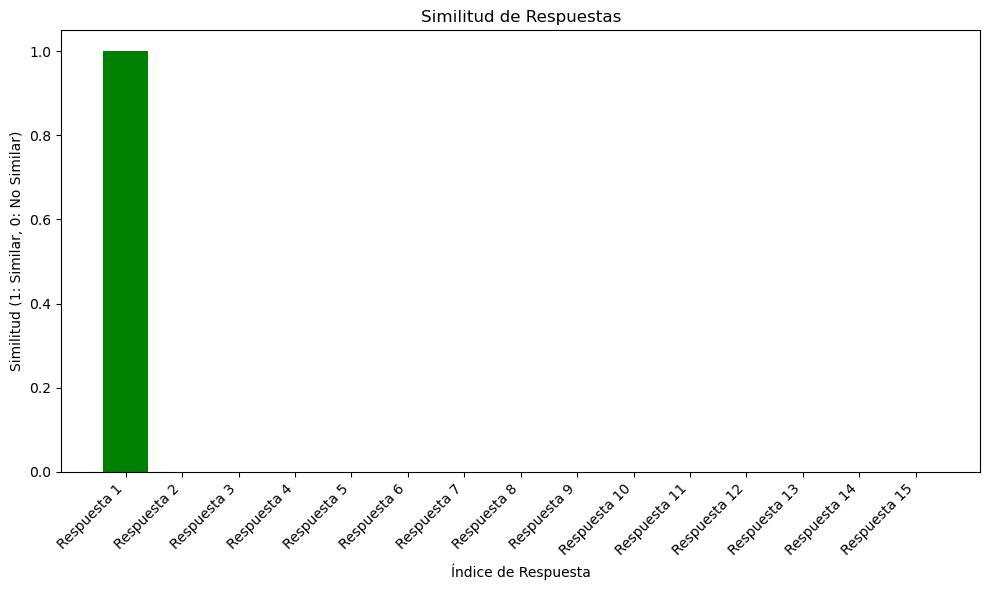

In [18]:
with open("resultados.json") as archivo_resultados:
    informacion = json.load(archivo_resultados)
    
df = pd.DataFrame(informacion)

num_respuestas = len(df)
etiquetas_respuestas = [f"Respuesta {i+1}" for i in range(num_respuestas)]

plt.figure(figsize=(10, 6))
plt.bar(df.index, df['SequenceMatcher_result'].apply(lambda x: x['similar']), color=['green' if sim == 1 else 'red' for sim in df['SequenceMatcher_result'].apply(lambda x: x['similar'])])
plt.title("Similitud de Respuestas")
plt.xlabel("Índice de Respuesta")
plt.ylabel("Similitud (1: Similar, 0: No Similar)")
plt.xticks(df.index, etiquetas_respuestas, rotation=45, ha="right")
plt.tight_layout()

plt.show()